In [64]:
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
def read_csv(CSV_LOG_FILE, label):
    csv_log_file = open(CSV_LOG_FILE, mode='r')
    reader = csv.reader(csv_log_file)
    epoch = 1
    avg_losses = []
    last_losses = []
    t_10 = []
    t_100 = []
    epoch_loss = []
    epoch_t10 = []
    epoch_t100 = []
    for row in reader:
        current_epoch = int(row[0])
        epoch_loss.append(float(row[2]))
        epoch_t10.append(float(row[3]))
        epoch_t100.append(float(row[4]))
        if(current_epoch > epoch):
            epoch = current_epoch
            #print(epoch)
            #Accumulate results
            avg_losses.append(np.mean(epoch_loss))
            last_losses.append(epoch_loss[-1])
            t_10.append(np.mean(epoch_t10))
            t_100.append(np.mean(epoch_t100))
            
            #Reset lists
            epoch_loss = []
            epoch_t10 = []
            epoch_t100 = []
    csv_log_file.close()
    return {'al':avg_losses,'el':last_losses,'t10':t_10,'t100':t_100,'label':label}

In [66]:
def generate_plots(items, prop, g_title):
    x = np.arange(len(items[0][prop]))
    for item in items:    
        plt.plot(x,item[prop],label=item['label'])
    #\n indicates a new line.
    plt.title(g_title)
    plt.legend()
    plt.show()

In [67]:
exp_1 = read_csv('1000examples/training_log_exp1.csv','exp1')
exp_2 = read_csv('1000examples/training_log_exp2.csv','exp2')
exp_3 = read_csv('1000examples/training_log_exp3.csv','exp3')
exp_4 = read_csv('1000examples/training_log_exp4.csv','exp4')
exp_5 = read_csv('1000examples/training_log_exp5.csv','exp5')
exp_6 = read_csv('1000examples/training_log_exp6.csv','exp6')
exp_7 = read_csv('1000examples/training_log_exp7.csv','exp7')
exp_8 = read_csv('1000examples/training_log_exp8.csv','exp8')
exp_9 = read_csv('1000examples/training_log_exp9.csv','exp9')
x = np.arange(200)

In [68]:
exps = [exp_1,exp_2,exp_3,exp_4,exp_5,exp_6,exp_7,exp_8,exp_9]

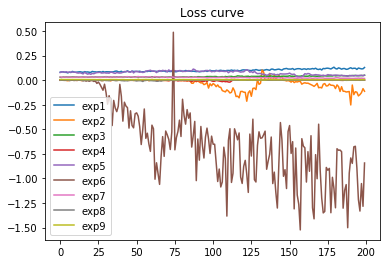

In [69]:
generate_plots(exps,'al','Loss curve')

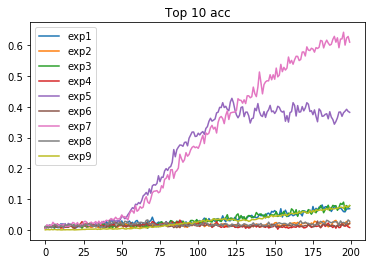

In [70]:
generate_plots(exps,'t10','Top 10 acc')

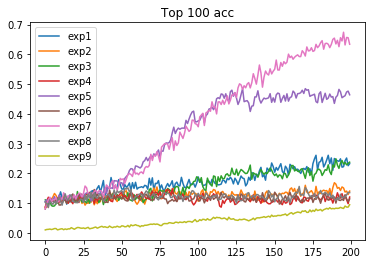

In [71]:
generate_plots(exps,'t100','Top 100 acc')

In [72]:
def read_keras_log(CSV_LOG_FILE):
    csv_log_file = open(CSV_LOG_FILE, mode='r')
    reader = csv.reader(csv_log_file)
    tl = []
    ta = []
    vl = []
    va = []
    c = 0
    for row in reader:
        if(c > 0):
            current_epoch = int(row[0])
            ta.append(float(row[1]))
            tl.append(float(row[2]))
            va.append(float(row[3]))
            vl.append(float(row[4]))
        c += 1
    csv_log_file.close()
    return {'tl':tl,'ta':ta,'vl':vl,'va':va}

In [73]:
a = read_keras_log('128_ada_v2_training.log')

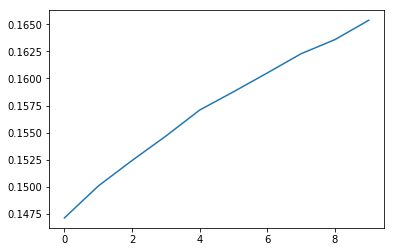

In [74]:
plt.plot(a['ta'])